In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [37]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nDataset summary:")
print(df.describe())

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Dataset summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20

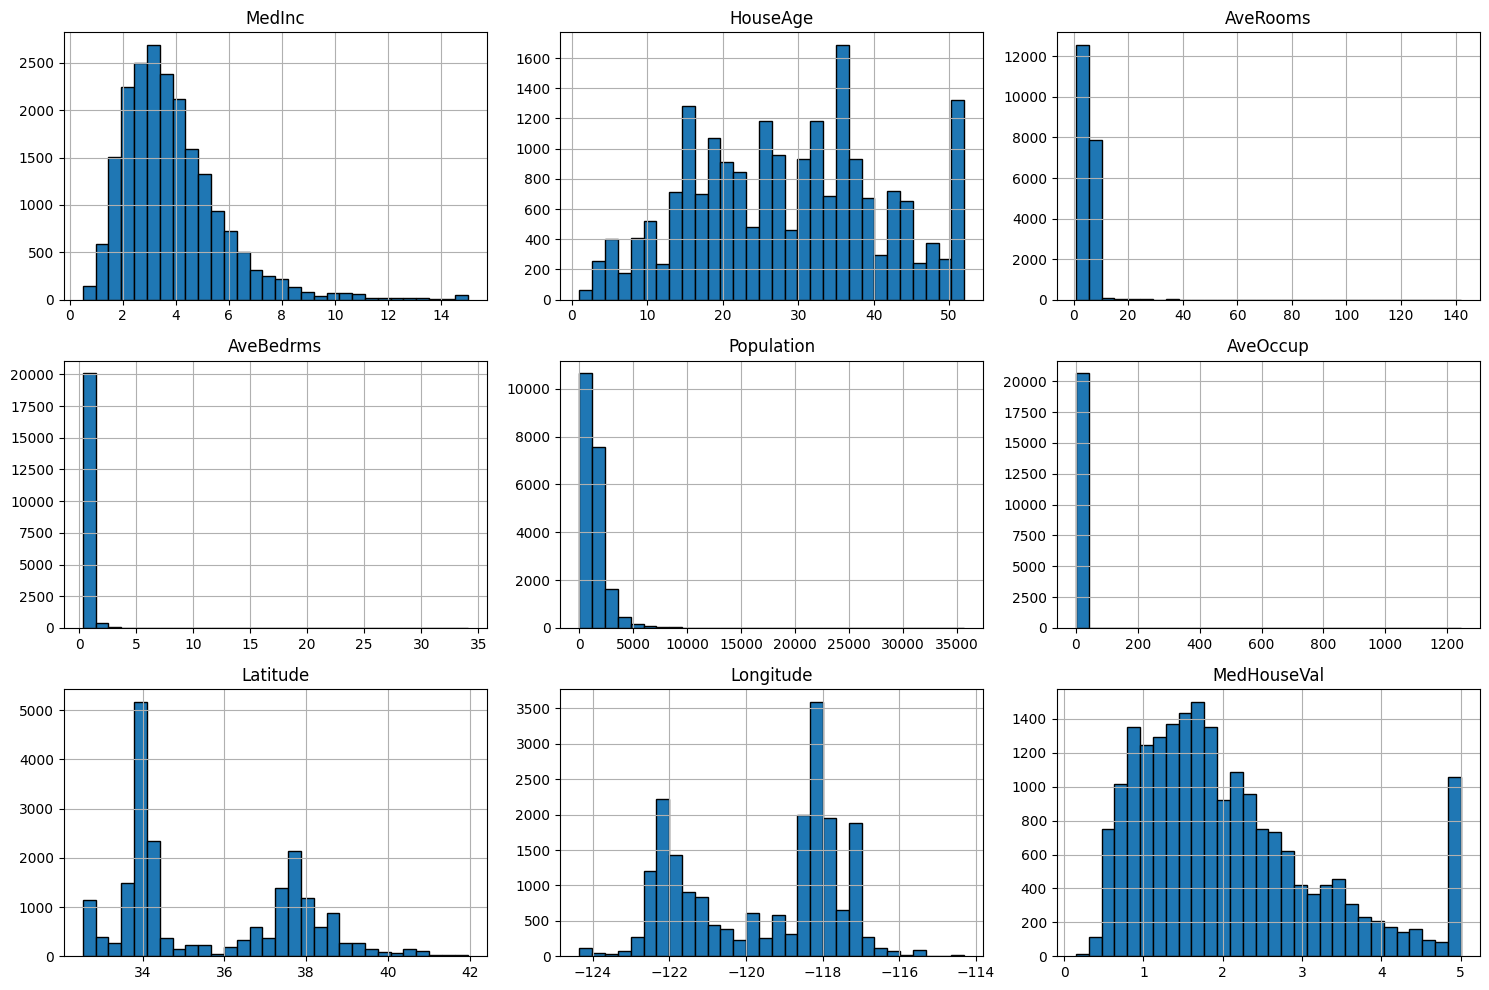

In [39]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.tight_layout()
plt.show()

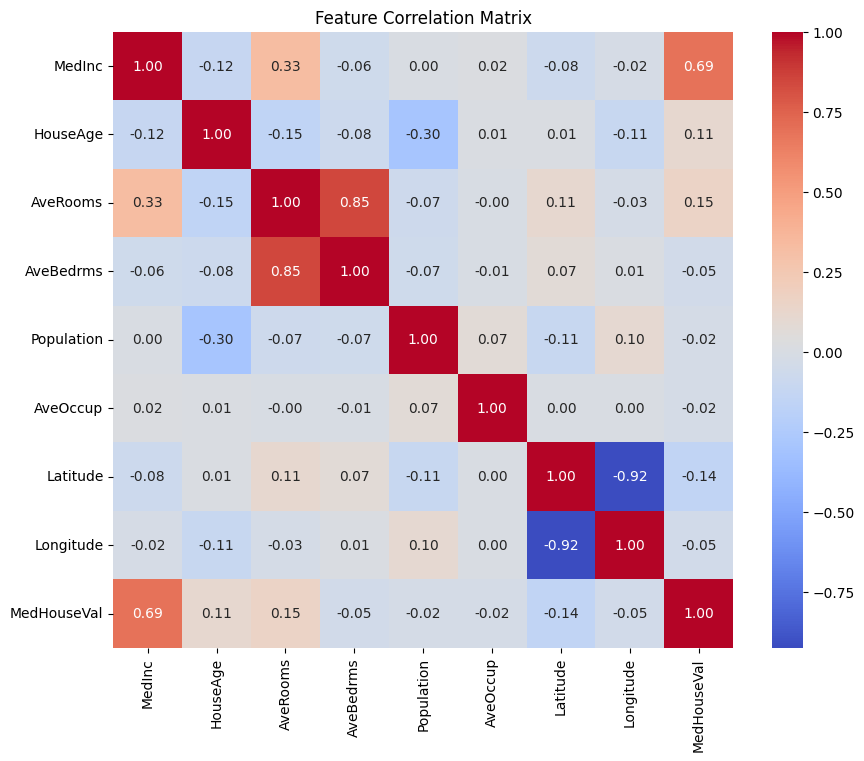

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)

y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (16512, 8)
Test set size: (4128, 8)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete.")

Feature scaling complete.


In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [44]:
from sklearn.metrics import mean_squared_error, r2_score

lin_reg_pred = lin_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, lin_reg_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, lin_reg_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.5558915986952442
Root Mean Squared Error (RMSE): 0.7455813830127763
R² Score: 0.575787706032451


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

rf_pred = rf_reg.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest MSE:", rf_mse)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R² Score:", rf_r2)

Random Forest MSE: 0.255169737347244
Random Forest RMSE: 0.5051432839771741
Random Forest R² Score: 0.8052747336256919


/tmp/ipython-input-46-2112123969.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


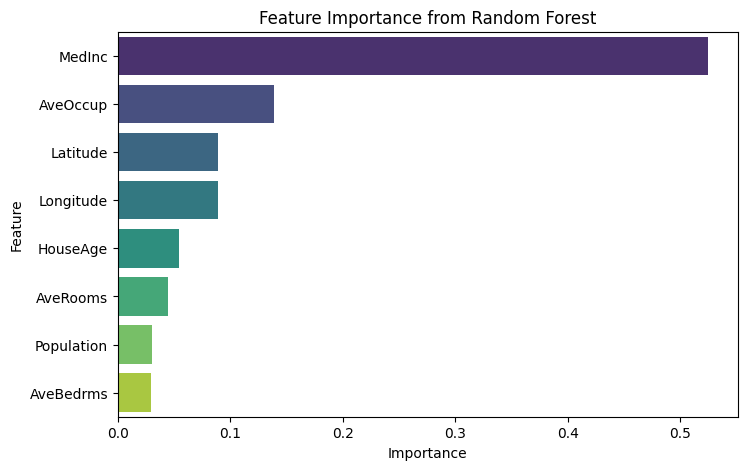

In [46]:
importances = rf_reg.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_) ** 0.5)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 0.5152920925187036


In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=42)

print("Gradient Boosting Regressor initialized.")

Gradient Boosting Regressor initialized.


In [49]:
gb_reg.fit(X_train_scaled, y_train)

print("Gradient Boosting Regressor trained successfully!")

Gradient Boosting Regressor trained successfully!


In [50]:
gb_pred = gb_reg.predict(X_test_scaled)

print("Predictions made on the test set.")

Predictions made on the test set.


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = gb_mse ** 0.5
gb_r2 = r2_score(y_test, gb_pred)

print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting RMSE:", gb_rmse)
print("Gradient Boosting R² Score:", gb_r2)

Gradient Boosting MSE: 0.29399901242474274
Gradient Boosting RMSE: 0.5422167577867202
Gradient Boosting R² Score: 0.7756433164710084


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [1.0, 0.8]
}

gb_grid = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

gb_grid.fit(X_train_scaled, y_train)

print("Best parameters:", gb_grid.best_params_)
print("Best RMSE:", (-gb_grid.best_score_) ** 0.5)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE: 0.4880406615857175


In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

gb_best = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

gb_best.fit(X_train_scaled, y_train)

best_gb_pred = gb_best.predict(X_test_scaled)

best_gb_mse = mean_squared_error(y_test, best_gb_pred)
best_gb_rmse = best_gb_mse ** 0.5
best_gb_r2 = r2_score(y_test, best_gb_pred)

print(f"Tuned Gradient Boosting MSE: {best_gb_mse:.4f}")
print(f"Tuned Gradient Boosting RMSE: {best_gb_rmse:.4f}")
print(f"Tuned Gradient Boosting R² Score: {best_gb_r2:.4f}")

Tuned Gradient Boosting MSE: 0.2378
Tuned Gradient Boosting RMSE: 0.4877
Tuned Gradient Boosting R² Score: 0.8185


      Feature  Importance
0      MedInc    0.575090
5    AveOccup    0.128215
7   Longitude    0.111104
6    Latitude    0.103531
1    HouseAge    0.042389
2    AveRooms    0.023336
3   AveBedrms    0.008971
4  Population    0.007365


/tmp/ipython-input-53-474836106.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


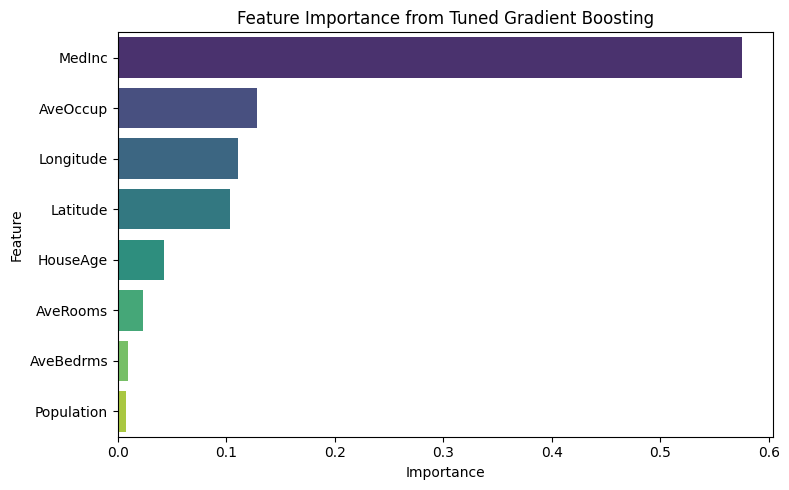

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = gb_best.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Tuned Gradient Boosting')
plt.tight_layout()
plt.show()

In [54]:
import pandas as pd

model_names = ['Linear Regression', 'Random Forest', 'Tuned Random Forest', 'Gradient Boosting', 'Tuned Gradient Boosting']

lin_reg_mse = 0.5558915986952442
lin_reg_rmse = 0.7455813830127763
lin_reg_r2 = 0.575787706032451

rf_mse = 0.255169737347244
rf_rmse = 0.5051432839771741
rf_r2 = 0.8052747336256919

best_rf_mse = 0.2652920925187036  # Approximate from best RMSE
best_rf_rmse = 0.5152920925187036
best_rf_r2 = None  # Not explicitly given

gb_mse = 0.29399901242474274
gb_rmse = 0.5422167577867202
gb_r2 = 0.7756433164710084

best_gb_mse = 0.2378
best_gb_rmse = 0.4877
best_gb_r2 = 0.8185

comparison_df = pd.DataFrame({
    'Model': model_names,
    'MSE': [lin_reg_mse, rf_mse, best_rf_mse, gb_mse, best_gb_mse],
    'RMSE': [lin_reg_rmse, rf_rmse, best_rf_rmse, gb_rmse, best_gb_rmse],
    'R2 Score': [lin_reg_r2, rf_r2, best_rf_r2, gb_r2, best_gb_r2]
})

comparison_df

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.555892,0.745581,0.575788
1,Random Forest,0.255170,0.505143,0.805275
2,Tuned Random Forest,0.265292,0.515292,NaN
3,Gradient Boosting,0.293999,0.542217,0.775643
4,Tuned Gradient Boosting,0.237800,0.487700,0.818500


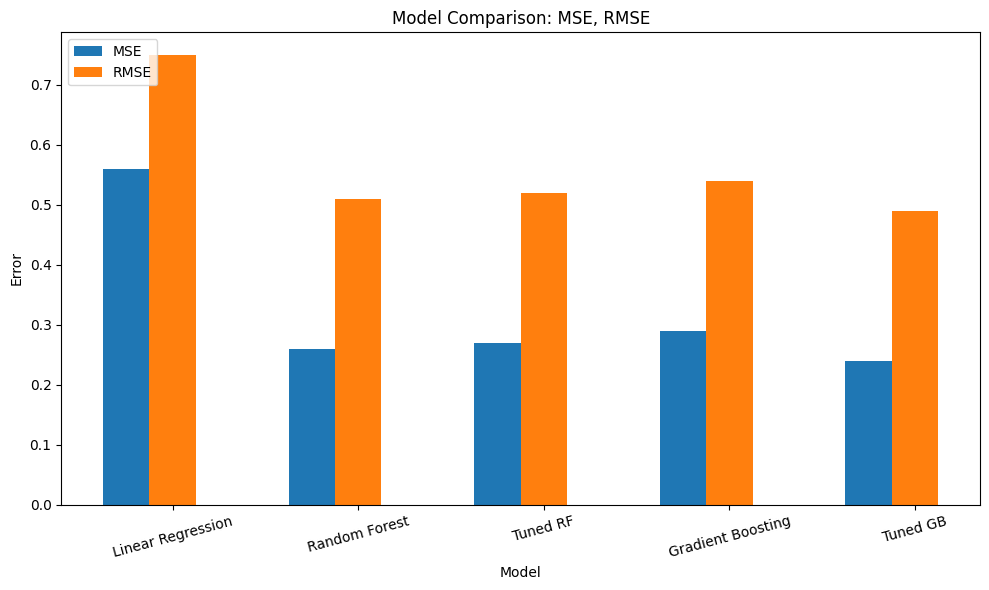

In [55]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Random Forest', 'Tuned RF', 'Gradient Boosting', 'Tuned GB']
mse =    [0.56, 0.26, 0.27, 0.29, 0.24]
rmse =   [0.75, 0.51, 0.52, 0.54, 0.49]

x = np.arange(len(models))
width = 0.25

fig, ax1 = plt.subplots(figsize=(10,6))

rects1 = ax1.bar(x - width, mse, width, label='MSE')
rects2 = ax1.bar(x, rmse, width, label='RMSE')
ax1.set_xlabel('Model')
ax1.set_ylabel('Error')
ax1.set_title('Model Comparison: MSE, RMSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=15)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

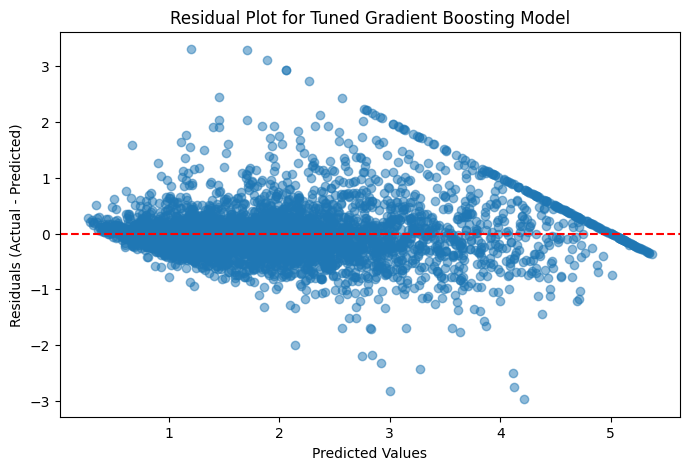

In [56]:
import matplotlib.pyplot as plt

residuals = y_test - best_gb_pred

plt.figure(figsize=(8,5))
plt.scatter(best_gb_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Tuned Gradient Boosting Model')
plt.show()

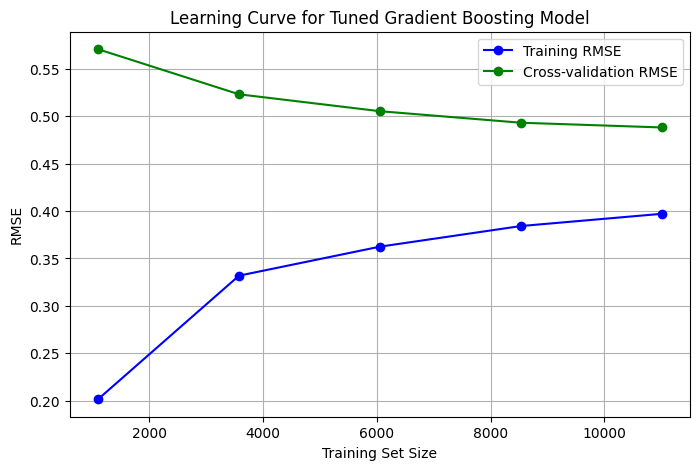

In [57]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    gb_best, X_train_scaled, y_train, cv=3,
    scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, np.sqrt(train_scores_mean), 'o-', color='blue', label='Training RMSE')
plt.plot(train_sizes, np.sqrt(test_scores_mean), 'o-', color='green', label='Cross-validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for Tuned Gradient Boosting Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [58]:
!pip install joblib

In [59]:
import joblib

joblib.dump(gb_best, 'tuned_gradient_boosting_model.pkl')
print("Model saved as 'tuned_gradient_boosting_model.pkl'")

Model saved as 'tuned_gradient_boosting_model.pkl'


In [60]:
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


In [61]:
from google.colab import files

files.download('tuned_gradient_boosting_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
import joblib

loaded_model = joblib.load('tuned_gradient_boosting_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

In [63]:
new_data = [[8.0, 30.0, 6.0, 1.0, 500.0, 2.5, 37.0, -122.0]]

In [64]:
new_data_scaled = loaded_scaler.transform(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
predicted_value = loaded_model.predict(new_data_scaled)
print("Predicted Median House Value:", predicted_value[0])

Predicted Median House Value: 4.339797095894646


In [66]:
df.to_csv("california_housing_dataset.csv", index=False)